In [1]:
from random import sample
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
def BubbleSort(lista, show_output=True):
  before = datetime.now()
  comparacoes = 0
  trocas = 0
  for k in range(1, len(lista)):
    troca = False
    for j in range(len(lista) -k):
      if (lista[j] > lista[j+1]):
        trocas += 1
        lista[j], lista[j+1] = lista[j+1], lista[j]
        troca = True
      comparacoes += 1
    if (troca == False):
      break
  after = datetime.now()
  if show_output:
    print(f"Tempo para ordenar {(after - before).total_seconds()}\nComparacoes {comparacoes}\nTrocas {trocas}\nLista de saida -> {lista}")
  return len(lista), comparacoes, trocas, (after - before).total_seconds()

In [3]:
def quickSort(lista, show_output=True):
  before = datetime.now()
  comparacoes = 0
  trocas = 0
  comparacoes, trocas = quickSortModulo(lista, 0,len(lista)-1, comparacoes, trocas)
  after = datetime.now()
  if show_output:
    print(f"Tempo para ordenar {(after - before).total_seconds()}\nComparacoes {comparacoes}\nTrocas {trocas}\nLista de saida -> {lista}")
  return len(lista), comparacoes, trocas, (after - before).total_seconds()

def quickSortModulo(lista, primeiro, ultimo, comparacoes, trocas):
  if primeiro<ultimo:
    indice_pivo, comparacoes, trocas = partition(lista, primeiro, ultimo, comparacoes, trocas)
    comparacoes, trocas = quickSortModulo(lista, primeiro, indice_pivo-1, comparacoes, trocas)
    comparacoes, trocas = quickSortModulo(lista, indice_pivo+1, ultimo, comparacoes, trocas)
  return comparacoes, trocas

def partition(lista, primeiro, ultimo, comparacoes, trocas):
  pivo = lista[primeiro]
  esquerda = primeiro+1
  direita = ultimo
  while esquerda <= direita:
    while (esquerda <= direita and lista[esquerda] <= pivo):
      esquerda = esquerda + 1
      comparacoes +=1

    while (lista[direita] >= pivo and direita >= esquerda):
      direita = direita -1
      comparacoes +=1

    if (direita > esquerda):
      lista[esquerda], lista[direita] = lista[direita], lista[esquerda]
      trocas += 1
      comparacoes +=1

  lista[primeiro], lista[direita] = lista[direita], lista[primeiro]
  trocas += 1
  return direita, comparacoes, trocas

In [4]:
def counting_sort(lista, show_output=True):
  before = datetime.now()
  comparacoes = 0
  trocas = 0
  maior = 0
  for v in lista:
    if(maior < v):
      maior = v
    comparacoes += 1
  maior +=1
  c = [0 for k in range(maior)]
  t = [0 for k in range(len(lista))]
  for k in range(len(lista)):
      c[lista[k]] = c[lista[k]] + 1
  for i in range(1, maior):
      c[i] = c[i] + c[i-1]
  for i in range(len(lista)-1, -1, -1):
      c[lista[i]] = c[lista[i]] - 1
      t[c[lista[i]]] = lista[i]
  for i in range(0, len(lista)):
      lista[i] = t[i]
      trocas += 1
  after = datetime.now()
  if show_output:
    print(f"Tempo para ordenar {(after - before).total_seconds()} segundos\nComparacoes {comparacoes}\nTrocas {trocas}\nLista de saida -> {lista}")
  return len(lista), comparacoes, trocas, (after - before).total_seconds()

In [5]:
dez = sample(range(200_000, 1, -2),  10)
cem = sample(range(1, 200_000),  100)
mil = sample(range(1, 200_000),  1_000)
dezmil = sample(range(1, 200_000),  10_000)
cemmil = sample(range(1, 200_000),  100_000)

In [6]:
def ordernar():
  x = int(input("Digite:\n1. BubbleSort.\n2. QuickSort\n3. CountingSort\nEscolha: "))
  if (x > 0 and x < 4):
    y = (input("Digite:\n1. Vetor com 10 elementos\n2. Vetor com 100 elementos\n3. Vetor com 1.000 elementos\n4. Vetor com 10.000 elementos\n5. Vetor com 100.000 elementos\nEscolha: "))
    print(y)
    y = int(y)
  if (x == 1):
    if (y == 1):
      BubbleSort(dez.copy())
    elif (y == 2):
      BubbleSort(cem.copy())
    elif (y == 3):
      BubbleSort(mil.copy())
    elif (y == 4):
      BubbleSort(dezmil.copy())
    elif (y == 5):
      BubbleSort(cemmil.copy())
  elif (x == 2):
    if (y == 1):
      quickSort(dez.copy())
    elif (y == 2):
      quickSort(cem.copy())
    elif (y == 3):
      quickSort(mil.copy())
    elif (y == 4):
      quickSort(dezmil.copy())
    elif (y == 5):
      quickSort(cemmil.copy())
  if (x == 3):
    if (y == 1):
      counting_sort(dez.copy())
    elif (y == 2):
      counting_sort(cem.copy())
    elif (y == 3):
      counting_sort(mil.copy())
    elif (y == 4):
      counting_sort(dezmil.copy())
    elif (y == 5):
      counting_sort(cemmil.copy())

In [7]:
def dados_bub():
  dados = []
  dados.append(BubbleSort(dez, show_output=False))
  dados.append(BubbleSort(cem, show_output=False))
  dados.append(BubbleSort(mil, show_output=False))
  dados.append(BubbleSort(dezmil, show_output=False))
  dados.append(BubbleSort(cemmil, show_output=False))
  return dados

In [8]:
def dados_quick():
  dados = []
  dados.append(quickSort(dez, show_output=False))
  dados.append(quickSort(cem, show_output=False))
  dados.append(quickSort(mil, show_output=False))
  dados.append(quickSort(dezmil, show_output=False))
  dados.append(quickSort(cemmil, show_output=False))
  return dados

In [9]:
def dados_count():
  dados = []
  dados.append(counting_sort(dez, show_output=False))
  dados.append(counting_sort(cem, show_output=False))
  dados.append(counting_sort(mil, show_output=False))
  dados.append(counting_sort(dezmil, show_output=False))
  dados.append(counting_sort(cemmil, show_output=False))
  return dados

In [10]:
def grafico(dados, title):
  colunas = ["Tamanho", "Comparações", "Trocas", "Tempo (s)"]
  df = pd.DataFrame(dados, columns=colunas)
  grafi, axes = plt.subplots(nrows = 1, ncols=3, figsize=(12, 4), tight_layout=True)
  grafi.suptitle(title, fontsize=18, fontweight='bold')
  
  for i in range(len(axes)):
    axes[i].plot(df[colunas[0]], df[colunas[i + 1]], color='red', linestyle='solid', markerfacecolor='blue', markersize=5) #, marker='o' - criar pontos
    axes[i].set_xlabel(colunas[0], fontsize='large', fontweight='bold')
    axes[i].set_ylabel(colunas[i+1], fontsize='large', fontweight='bold')
    axes[i].axhline(color="black")
    axes[i].axvline(color="black")
    axes[i].tick_params(axis='x', rotation=60)

  plt.show()

In [11]:
def dados_quic_0_100k(array_random):
  dados_quickSort = []
  for a in array_random:
    dados_quickSort.append(quickSort(a, show_output=False))
  return dados_quickSort

In [12]:
def dados_count_0_100k(array_random):
  dados_count = []
  for a in array_random:
    dados_count.append(counting_sort(a, show_output=False))
  return dados_count

In [13]:
def dados_bub_0_20k(array_random):
  dados_bub = []
  for a in array_random:
    dados_bub.append(BubbleSort(a, show_output=False))
  return dados_bub

In [14]:
def compara_tempo(a, b, c):
  plt.plot(a["Tamanho"], a["Tempo (s)"])
  plt.plot(b["Tamanho"], b["Tempo (s)"])
  plt.plot(c["Tamanho"], c["Tempo (s)"])
  plt.ylim(-5, c["Tempo (s)"].max())
  plt.legend(('QuickSort', 'CountingSort', 'BubbleSort'),
           loc='upper right')
  plt.show()

In [15]:
def sai_graphics():
  start = []
  for k in range(0, 200_001, 1_000):
    a = (sample(range(0, 200_000), k))
    start.append(a)
  array_random_one = []
  array_random_two = []
  array_random_three = []
  for k in start:
    array_random_one.append(k.copy())
    array_random_two.append(k.copy())
    array_random_three.append(k.copy())
  a = pd.DataFrame(dados_quic_0_100k(array_random_one),columns=["Tamanho", "Comparações", "Trocas", "Tempo (s)"])
  grafico(a, "QuickSort")
  b = pd.DataFrame(dados_count_0_100k(array_random_two),columns=["Tamanho", "Comparações", "Trocas", "Tempo (s)"])
  grafico(b, "CountingSort")
  c= pd.DataFrame(dados_bub_0_20k(array_random_three[:21]),columns=["Tamanho", "Comparações", "Trocas", "Tempo (s)"])
  grafico(c, "BubbleSort")
  compara_tempo(a,b,c)

In [16]:
def ordena_tudo():
  (grafico(pd.DataFrame(dados_quick(), columns=["Tamanho", "Comparações", "Trocas", "Tempo (s)"]), "QuickSort"))
  (grafico(pd.DataFrame(dados_count(), columns=["Tamanho", "Comparações", "Trocas", "Tempo (s)"]), "CountingSort"))
  (grafico(pd.DataFrame(dados_bub(), columns=["Tamanho", "Comparações", "Trocas", "Tempo (s)"]), "BubbleSort"))

In [17]:
def menu():
  x = 1
  while x > 0:
    x = int(input("Escolha:\n1. Mostrar os vetores de entrada.\n2. Ordenar vetor\n3. Ordena tudo\n4. Exibir os Graficos -> Array Gerado aleatoriamente de tamanho 0 a 25mil bub e 0 a 100mil os outros dois\n0. Sair\nResposta: "))
    if (x == 1):
      y = int(input("Digite:\n1. Vetor com 10 elementos\n2. Vetor com 100 elementos\n3. Vetor com 1.000 elementos\n4. Vetor com 10.000 elementos\n5. Vetor com 100.000 elementos\nEscolha: "))
      if (y == 1):
        print(f"{dez}\n")
      elif (y == 2):
        print(f"{cem}\n")
      elif (y == 3):
        print(f"{mil}\n")
      elif (y == 4):
        print(f"{dezmil}\n")
      elif (y == 5):
        print(f"{cemmil}\n")
    elif (x == 2):
      ordernar()
    elif (x == 3):
      ordena_tudo()
    elif (x == 4):
      sai_graphics()

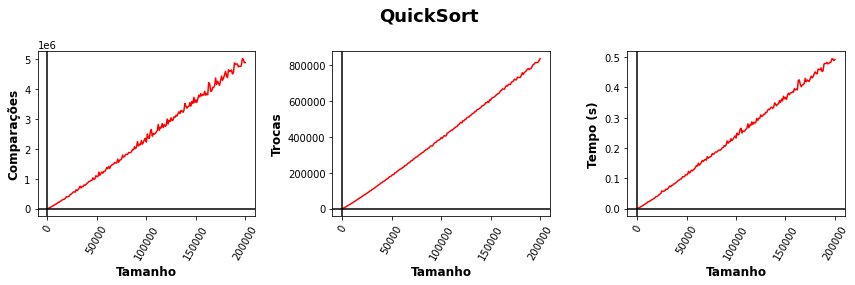

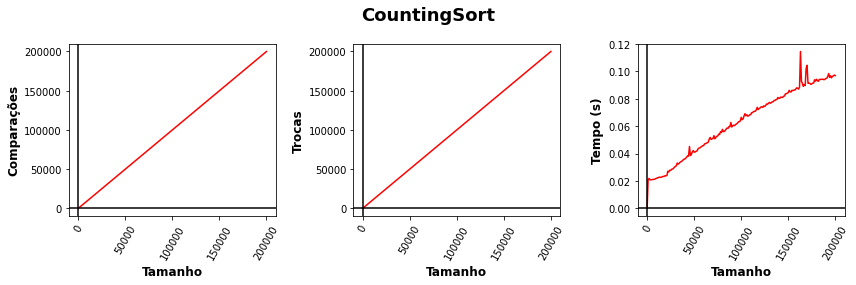

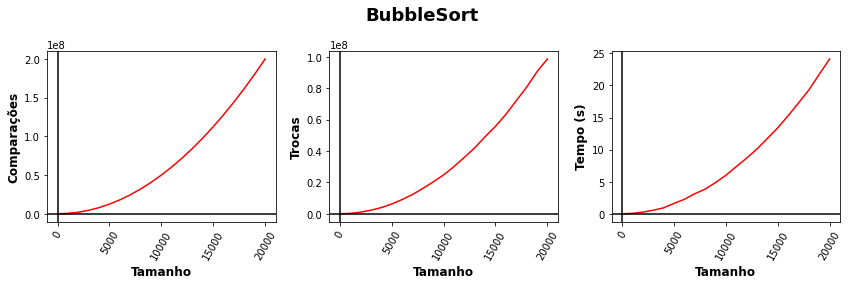

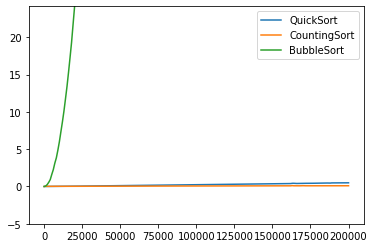

In [18]:
menu()